In [1]:
#Packages laden
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy 
import math
from scipy.stats import kurtosis, norm, mstats
from statistics import mode
from matplotlib.patches import Polygon
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller

C:\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [5]:
#Daten laden und technische Eigenschaften anzeigen
DATA_FILE="Dropbox/Masterarbeit/Masterarbeit/Datensätze/Geburtenrate/Datensatz.xlsx"
df = pd.read_excel(DATA_FILE)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 2 columns):
Jahr-Monat        863 non-null datetime64[ns]
Lebendgeborene    863 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 13.6 KB


In [7]:
#Zeitspalte als Index festlegen 
df=pd.read_excel(DATA_FILE, index_col='Jahr-Monat')
df.index

DatetimeIndex(['1946-01-01', '1946-02-01', '1946-03-01', '1946-04-01',
               '1946-05-01', '1946-06-01', '1946-07-01', '1946-08-01',
               '1946-09-01', '1946-10-01',
               ...
               '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01',
               '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01',
               '2017-10-01', '2017-11-01'],
              dtype='datetime64[ns]', name='Jahr-Monat', length=863, freq=None)

In [8]:
#Spalte (Anzahl) Lebendgeborener als Zeitreihe (time series) festlegen
ts=df['Lebendgeborene']

In [9]:
#Lage-, Streu- und Zusammenhangsmaße 
ts.describe()

count       863.000000
mean      76678.129780
std       17810.862468
min       47920.000000
25%       63205.500000
50%       70554.000000
75%       91105.000000
max      124628.000000
Name: Lebendgeborene, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x2896b85f6a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2896b85f828>,
 'boxes': [<matplotlib.lines.Line2D at 0x2896b919668>],
 'medians': [<matplotlib.lines.Line2D at 0x2896b87df28>],
 'fliers': [<matplotlib.lines.Line2D at 0x2896b87dac8>],
 'means': []}

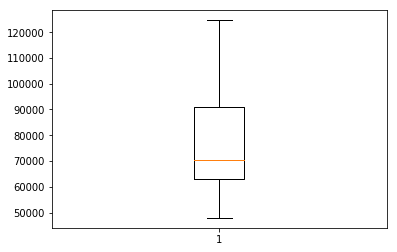

In [10]:
plt.boxplot(ts)

In [11]:
np.median(ts)

70554.0

In [12]:
np.var(ts)

316859235.72591513

In [13]:
scipy.stats.skew(ts)

0.675446100795784

In [14]:
scipy.stats.kurtosis(ts)

-0.6658779377962509

In [15]:
np.corrcoef(ts)

1.0

In [16]:
mode(ts)

StatisticsError: no unique mode; found 8 equally common values

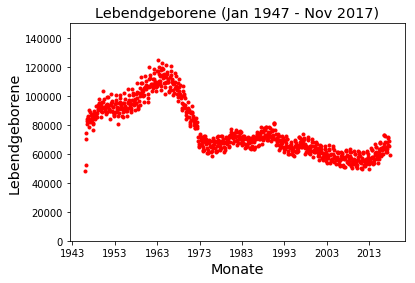

In [17]:
fix,ax=plt.subplots()
plt.title("Lebendgeborene (Jan 1947 - Nov 2017)", size="x-large")
plt.ylabel("Lebendgeborene", size="x-large")
plt.xlabel("Monate", size="x-large")
plt.ylim(0,150000)
plt.plot(ts,'r.', markersize=6, linewidth=2)

In [19]:
plt.show()

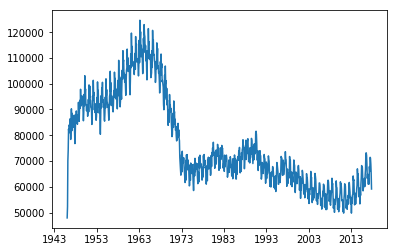

In [20]:
plt.plot(ts)

In [21]:
#Stationarität
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


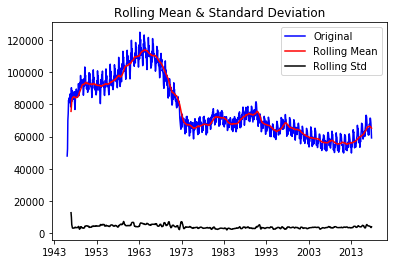

Results of Dickey-Fuller Test:
Test Statistic                  -0.932632
p-value                          0.777036
#Lags Used                      21.000000
Number of Observations Used    841.000000
Critical Value (1%)             -3.438149
Critical Value (5%)             -2.864983
Critical Value (10%)            -2.568603
dtype: float64


In [22]:
test_stationarity(ts)

In [24]:
kpssoutput_c=kpss(ts,regression='c')
kpssoutput_c

C:\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1258: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


(2.9202598296715414,
 0.01,
 21,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [25]:
kpssoutput_t=kpss(ts,regression='ct')
kpssoutput_t

C:\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1258: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


(0.2528875493096102,
 0.01,
 21,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

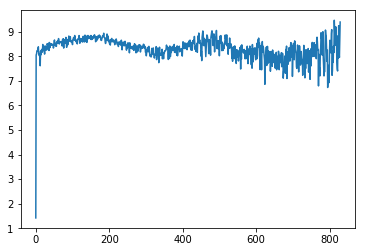

In [46]:
#deterministisches Chaos
from math import log
 
def d(series,i,j):
    return abs(series[i]-series[j])
 
N=len(ts)
eps=10
dlist=[[] for i in range(N)]
n=0 #number of nearby pairs found
for i in range(N):
    for j in range(i+1,N):
        if d(ts,i,j) < eps:
            n+=1
            for k in range(min(N-i,N-j)):
                if d(ts,i+k,j+k)>0:
                    dlist[k].append(log(d(ts,i+k,j+k)))
f=open('lyapunov.txt','w')
for i in range(len(dlist)):
    if len(dlist[i]):
        print(i, sum(dlist[i])/len(dlist[i]), file=f)
f.close()

f=open('lyapunov.txt', 'r')
lyap_exp=[float(i) for i in f.read().split()]
f.close()
del lyap_exp[0::2]
plt.plot(lyap_exp)

In [27]:
#Trend detection
def mk_test(zr, alpha = 0.00001):
    """
    Mann-Kendall test for trend
    Input:
        x:   a vector of data
        alpha: significance level (0.001 default) 
    Output:
        h: True (if trend is present) or False (if trend is absence)
        p: p value of the significance test
        z: normalized test statistics 
    """
    n = len(zr)
    # calculate S 
    s = 0
    for k in range(n-1):
        for j in range(k+1,n):
            s += np.sign(zr[j] - zr[k])
    #s = [-1 if x[j] < x[k] else 1 for j in xrange(k+1,n) for k in xrange(n-1)]

    # calculate the unique data
    unique_zr = np.unique(zr)
    g = len(unique_zr)
    # calculate the var(s)
    n = float(n)
    if n == g: # there is no tie
        var_s = (n*(n-1)*(2*n+5))/18
        print (var_s)
    else: # there are some ties in data
        tp = np.zeros(unique_zr.shape)
        for i in range(len(unique_zr)):
            tp[i] = sum(unique_zr[i] == zr)
        var_s = (n*(n-1)*(2*n+5) + np.sum(tp*(tp-1)*(2*tp+5)))/18

    if s>0:
        z = (s - 1)/np.sqrt(var_s)
    elif s == 0:
        z = 0
    elif s<0:
        z = (s + 1)/np.sqrt(var_s)

    # calculate the p_value
    p = 2*(1-norm.cdf(abs(z))) # two tail test
    h = abs(z) > norm.ppf(1-alpha/2) 
    if (z<0) and h:
        trend = 'decreasing'
    elif (z>0) and h:
        trend = 'increasing'
    else:
        trend = 'no trend'
    if mode == 'full':
        return trend, h, p, z
    else:
        return h, abs(z)

In [28]:
mk_test(ts, alpha = 0.00001)

(True, 26.004392128998848)

In [ ]:
#Prüfung auf Nicht-Linearität
# linear bis t-4
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from pandas.tools.plotting import autocorrelation_plot

In [ ]:
ts=pd.to_numeric(ts,downcast='float')

In [ ]:
autocorrelation_plot(ts)

In [ ]:
model = ARIMA(ts, order=(200,0,0))

In [ ]:
model_fit=model.fit()

In [31]:
#Linearität
scipy.stats.anderson(ts, dist='norm')

AndersonResult(statistic=26.027513847694195, critical_values=array([0.573, 0.653, 0.783, 0.914, 1.087]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))